#**Ujian Tengah Semester Pengolahan Citra 2023**
###***Rio Agustian Gilang Fernando, Fisika, 4211420004***
###***Fakultas Matematika dan Ilmu Pengetahuan Alam***

###1. Berilah penjelasan tentang format citra true color dan citra 8-bit grayscale.

**Format citra *true color*** adalah citra yang memiliki warna sebenarnya (*true*) yang biasa dikesan manusia. Warna ini berasal dari kombinasi warna merah, hijau, dan biru.

**Format citra 8-bit grayscale** adalah citra yang memiliki nilai intensitas yang jumlah variannya sebanyak $2^8 = 256$, yaitu dari 0-255. Intensitas 0 merepresentasikan hitam maksimum dan intensitas 255 merepresentasikan warna putih maksimum.

###2. Berilah penjelasan tentang point processing pada citra dan berilah contohnya pada citra foto close up Saudara dengan Python.

**Pemrosesan titik *(point processing)*** pada citra digital, dilakukan operasi pada setiap piksel secara terpisah tanpa mempertimbangkan piksel-piksel sekitarnya. Contoh pomrosesan titik di antaranya: operasi penjumlahan *(brightness operation)*, operasi perkalian *(contrast operation)*, dan komplemen gambar *(image complement).*

###**Operasi Penjumlahan *(Brightness Operation)***

In [1]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


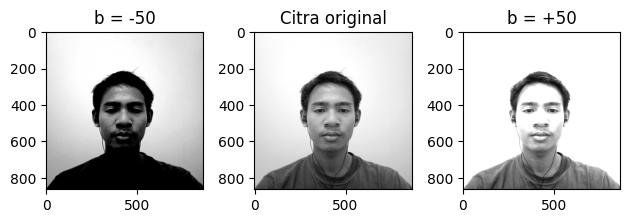

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Citra original
img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/sigma.jpg", 0)

# Masukakannya array citra dan faktor b (bisa + dan -)
def bright(ctra, b):
  ctra = ctra.astype(float)
  ctra = ctra + b
  ctra[ctra < 0  ] = 0
  ctra[ctra > 255] = 255
  ctra = ctra.astype(np.uint8)
  return ctra

img1 = bright(img, -100) # kecerahan diturunkan (b negatif)
img2 = bright(img,  100) # kecerahan dinaikan (b positif)

plt.subplot(131)
plt.title("b = -50")
plt.imshow(img1, cmap="gray")

plt.subplot(132)
plt.title("Citra original")
plt.imshow(img, cmap="gray")

plt.subplot(133)
plt.title("b = +50")
plt.imshow(img2, cmap="gray")

plt.tight_layout()
plt.show()

###**Operasi Perkalian *(Contrast Operation)***

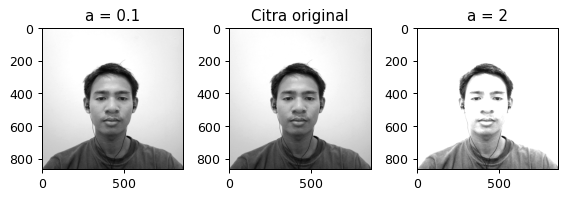

In [98]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Citra original
img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/sigma.jpg", 0)

# Masukakannya array citra dan faktor a 
def contr(ctra, a):
  ctra = ctra.astype(float)
  ctra = ctra * a
  ctra[ctra < 0  ] = 0
  ctra[ctra > 255] = 255
  ctra = ctra.astype(np.uint8)
  return ctra

img1 = contr(img, 0.5) # kontras diturunkan (0 < a < 1)
img2 = contr(img, 2.0) # kontras dinaikan (a > 1)

plt.figure(dpi=90)
plt.subplot(131)
plt.title("a = 0.1")
plt.imshow(img1, cmap="gray")

plt.subplot(132)
plt.title("Citra original")
plt.imshow(img, cmap="gray")

plt.subplot(133)
plt.title("a = 2")
plt.imshow(img2, cmap="gray")

plt.tight_layout()
plt.show()

###**Komplemen Gambar *(Image Complement)***

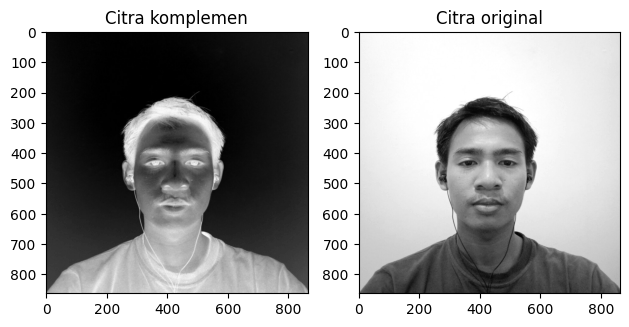

In [60]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Citra original
img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/sigma.jpg", 0)

# Masukakannya array citra dan faktor a 
def comp(ctra):
  ctra = ctra.astype(float)
  ctra = 255 - ctra 
  ctra[ctra < 0  ] = 0
  ctra[ctra > 255] = 255
  ctra = ctra.astype(np.uint8)
  return ctra

img1 = comp(img)

plt.subplot(121)
plt.title("Citra komplemen")
plt.imshow(img1, cmap="gray")

plt.subplot(122)
plt.title("Citra original")
plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

###3. Berilah penjelasan tentang histogram citra dan berilah contoh operasi histogram streching dan histogram equalization pada citra foto close-up saudara! Tampilkanlah histogram asal dan histogram hasilnya!

**Histogram citra** adalah suatu representasi visual yang digunakan untuk menampilkan distribusi intensitas piksel dalam citra menggunakan diagram batang. Contoh dari pengolahan histogram citra adalah histogram stretching dan histogram equalization.

###**Histogram Stretching**

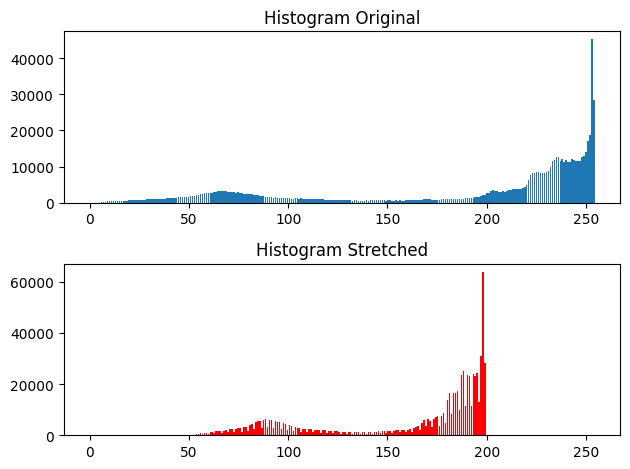

In [74]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Citra original
img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/sigma.jpg", 0)

# Citra setelah diubah nilai rentang intensitasnya
pix_min = 50        # Intensitas minimum yang dikehendaki
pix_max = 200       # Intensitas maximum yang dikehendaki
img1 = cv.normalize(img, None, pix_min, pix_max, cv.NORM_MINMAX)

hist,  bins  = np.histogram(img , bins=256, range=[0, 255])
hist1, bins1 = np.histogram(img1, bins=256, range=[0, 255])

plt.subplot(211)
plt.title("Histogram Original")
plt.bar(bins[:-1], hist)

plt.subplot(212)
plt.title("Histogram Stretched")
plt.bar(bins1[:-1], hist1, color="red")

plt.tight_layout()
plt.show()

###**Histogram Equalization**

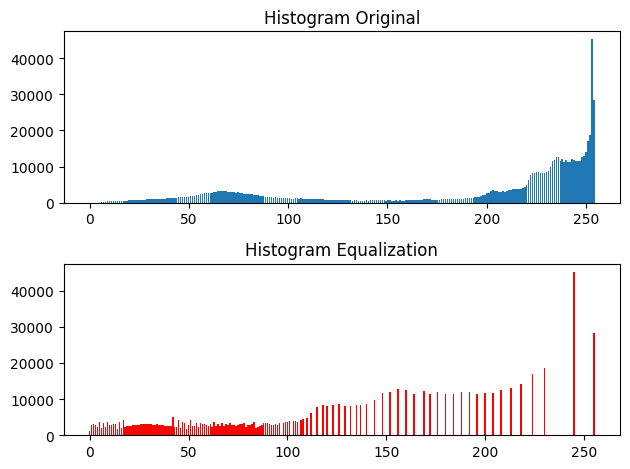

In [78]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Citra original
img = cv.imread("/gdrive/MyDrive/ASEMESTER_6/IMAGE_PROCESSING/sigma.jpg", 0)

# Menghitung histogram citra
hist, bins = np.histogram(img, bins=256, range=[0, 255])

# Menghitung fungsi distribusi kumulatif
cdf = hist.cumsum()

# Normalisasi fungsi distribusi kumulatif
new_val = cdf * (len(hist) - 1) / cdf.max()
new_val = np.around(new_val)
new_val = new_val.astype(np.uint8)

# Menghitung nilai intensitas baru untuk setiap piksel
img1 = cv.LUT(img, new_val)

# Histogram citra baru
hist1, bins1 = np.histogram(img1, bins=256, range=[0, 256])

plt.subplot(211)
plt.title("Histogram Original")
plt.bar(bins[:-1], hist)

plt.subplot(212)
plt.title("Histogram Equalization")
plt.bar(bins1[:-1], hist1, color="red")

plt.tight_layout()
plt.show()

###4. Diberikan citra 3-bit berukuran 5 x 5 seperti di bawah ini.

$$
\begin{aligned}
  \begin{array}{|l|c|r|}
    \hline
    0 & 0 & 1 & 1 & 2\\ \hline
    0 & 1 & 1 & 2 & 4\\ \hline
    1 & 1 & 2 & 4 & 5\\ \hline
    1 & 3 & 4 & 5 & 6\\ \hline
    3 & 3 & 5 & 6 & 7\\ \hline
    \hline
  \end{array}
\end{aligned}
$$

>a. Gambarkan histogram citra tersebut.

>b. Lakukan perataan histogram (histogram equalization) pada citra tersebut.

>c. Tuliskan kembali citra hasil perataan histogram (dalam bentuk matriks) dan
histogramnya.

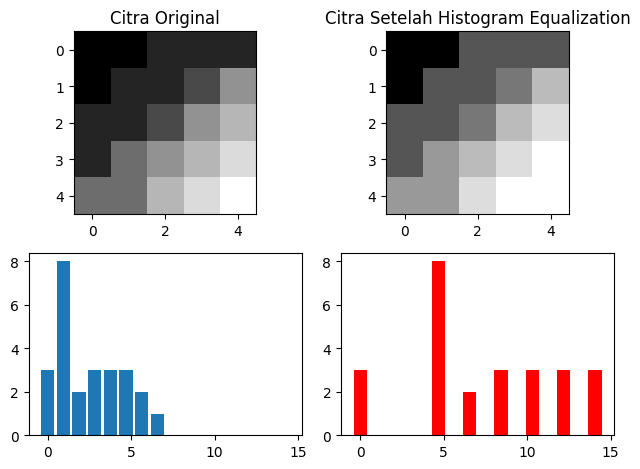

In [95]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = [[0, 0, 1, 1, 1],
       [0, 1, 1, 2, 4],
       [1, 1, 2, 4, 5],
       [1, 3, 4, 5, 6],
       [3, 3, 5, 6, 7]]
       
img_4bit  = np.array(img)
img_8bit  = np.uint8(img_4bit*16)
img_8bit1 = cv.equalizeHist(img_8bit)
img_4bit1 = np.uint8(img_8bit1/16)

# Histogram citra baru
hist,  bins  = np.histogram(img_4bit , bins=16, range=[0, 15])
hist1, bins1 = np.histogram(img_4bit1, bins=16, range=[0, 15])

plt.subplot(221)
plt.title("Citra Original")
plt.imshow(img_4bit, cmap="gray")

plt.subplot(223)
plt.bar(bins[:-1], hist)

plt.subplot(222)
plt.title("Citra Setelah Histogram Equalization")
plt.imshow(img_4bit1, cmap="gray")

plt.subplot(224)
plt.bar(bins1[:-1], hist1, color="red")

plt.tight_layout()
plt.show()